# Summary Statistics for Extended Pink Populaations with Fully Filtered Genotypes Using the Program Plink 

## Background: 
The population data have already been filtered in R for a variety of factors (not in this order): locus genotype rate of 80%, MAF of >0.05 in at least one population, individuals that were genotyped in at least 80% of loci, loci that met HWE expectations of 0.05 in at least 9 populations (50%), the highest MAF SNP per tag, and loci that were not identified as paralogs. These filters are detailed in the ipython notebook:stacks_filtering_genotypes_extended_populations.ipynb  

After filtering we have 465 individuals and 23,759 loci. The genotypes were converted to the necessary PLINK formats using PGDSpider. 

This notebook is basically a copy of one written by Ryan Waples:
http://nbviewer.ipython.org/github/rwaples/chum_populations/blob/master/plot_pop_genotypes.ipynb (thanks!)


### 1. Set the working directory. 
    This folder has a copy of the program Plink V.1.9, as well as the converted .ped and .map files, and a population information txt file with the names of the populations and their conteninents and lineages along with some numbering to order them in plots. 

# CAVEAT: The Lakelse population's samples are most likely swapped with each other; the 06 is actually the 07 and vice a versa. They have not been corrected here. They probably will be re-labeled soon. 

In [1]:
cd Z:\WORK\TARPEY\Exp_Pink_Pops\Analysis\PLINK

Z:\WORK\TARPEY\Exp_Pink_Pops\Analysis\PLINK


### 2. Generate summary statistics in Plink 

#Make this a "code" box and run the following to generate the plink results; I change it to "markdown" after because there are too many lines of results that show up here. 

!plink --file "PLINK_23759_465" --family --missing --freq --het small-sample --ibc --fst --allow-extra-chr --allow-no-sex --write-snplist --make-bed --out PLINK_23759_465_out

### Plot Summary statistics 


In [ ]:
#!pip install seaborn
#!python -m pip install --upgrade pip

In [4]:
import numpy as np
import pandas as pd
import scipy
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("white")
%matplotlib inline

## Population Information

In [5]:
POPINFO = pd.read_csv('POPINFO.txt', sep ="\t")
POPINFO.index += 1
POPINFO.head(19)

,Order_geo,Order_lin,CLUSTER,POP,SILLI,POPNAME,YEAR,LINEAGE,CONTINENT
1,4,11,1,pop_1,PAMUR10,AMUR10,2010,Even,Asia
2,16,17,10,pop_10,PLAKEL06,LAKEL06,2006,Even,North America
3,15,8,11,pop_11,PLAKEL07,LAKEL07,2007,Odd,North America
4,9,5,12,pop_12,PNOME91,NOME91,1991,Odd,North America
5,10,14,13,pop_13,PNOME94,NOME94,1994,Even,North America
6,17,9,14,pop_14,PSNOH03,SNOH03,2003,Odd,North America
7,18,18,15,pop_15,PSNOH96,SNOH96,1996,Even,North America
8,12,15,16,pop_16,PSPINK14,SUSIT14,2014,Even,North America
9,5,3,17,pop_17,PTAUY09,TAUY09,2009,Odd,Asia
10,6,12,18,pop_18,PTAUY12,TAUY12,2012,Even,Asia


### Missingness per population

In [16]:
imiss = pd.read_csv('PLINK_23759_465_out.imiss', sep = " ", skipinitialspace = True, index_col = False)
print(len(imiss))
imiss.head()

465


,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS
0,pop_1,PAMUR10_0001,Y,579,23759,0.02437
1,pop_1,PAMUR10_0002,Y,510,23759,0.02147
2,pop_1,PAMUR10_0003,Y,567,23759,0.02386
3,pop_1,PAMUR10_0004,Y,433,23759,0.01822
4,pop_1,PAMUR10_0005_comb,Y,1401,23759,0.05897


In [7]:
imiss.dtypes

FID            object
IID            object
MISS_PHENO     object
N_MISS          int64
N_GENO          int64
F_MISS        float64
dtype: object

In [12]:
POPINFO.head()
POPINFO.dtypes

Order_geo     int64
Order_lin     int64
CLUSTER       int64
POP          object
SILLI        object
POPNAME      object
YEAR          int64
LINEAGE      object
CONTINENT    object
dtype: object

In [17]:
imiss = pd.merge(imiss, POPINFO, left_on = 'FID', right_on = 'POP')
imiss = imiss.sort(columns = 'Order_geo')

C:\Users\Carolyn\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [18]:
print(len(imiss))
imiss.head()
#imiss.dtypes

465


,FID,IID,MISS_PHENO,N_MISS,N_GENO,F_MISS,Order_geo,Order_lin,CLUSTER,POP,SILLI,POPNAME,YEAR,LINEAGE,CONTINENT
232,pop_9,PKUSHI07_0005_comb,Y,506,23759,0.02130,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
228,pop_9,PKUSHI07_0001_comb,Y,436,23759,0.01835,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
229,pop_9,PKUSHI07_0002_comb,Y,502,23759,0.02113,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
231,pop_9,PKUSHI07_0004,Y,827,23759,0.03481,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
233,pop_9,PKUSHI07_0006_comb,Y,488,23759,0.02054,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia


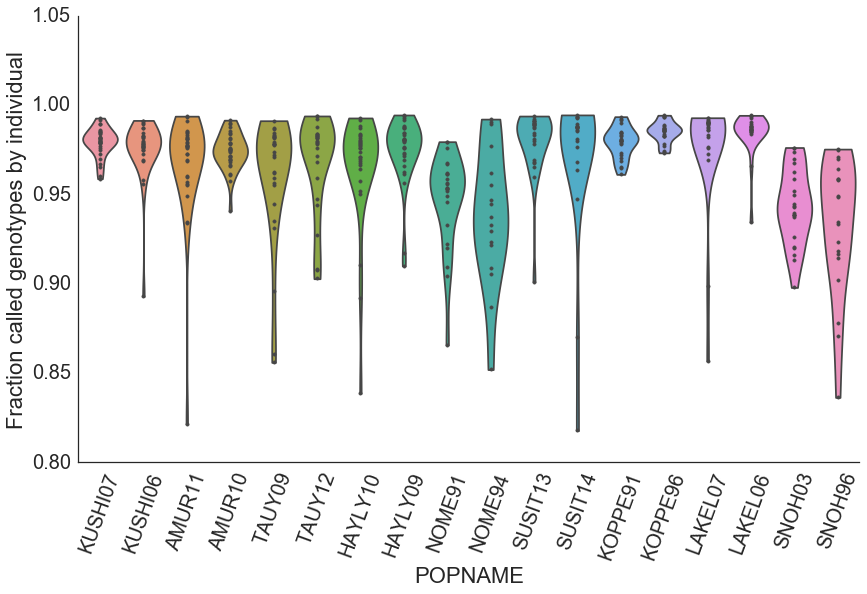

In [19]:
figsize(14, 8)
sns.violinplot(x = imiss['POPNAME'], y = (1-imiss['F_MISS']), bw = .5, cut =.01, scale = "width", width = .8, inner = "points", inner_kws = {"ms": 16})
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.ylabel('Fraction called genotypes by individual')
sns.despine()
plt.show()

### Number of missing genotypes per locus

In [20]:
lmiss = pd.read_csv('PLINK_23759_465_out.lmiss', sep = " ", skipinitialspace = True,index_col = False)
lmiss_means = lmiss.groupby(['SNP']).mean()
lmiss_sums = lmiss.groupby(['SNP']).sum()
print(len(lmiss))

427662


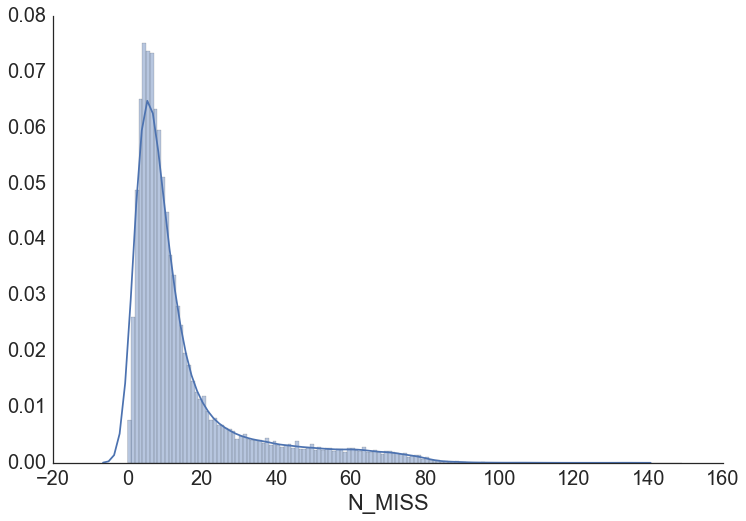

In [21]:
figsize(12,8)
sns.distplot(lmiss_sums['N_MISS'], bins = range(150))
sns.despine()
plt.show()

### Fraction missing per locus
distribution of per locus missingness, mean of population missingness

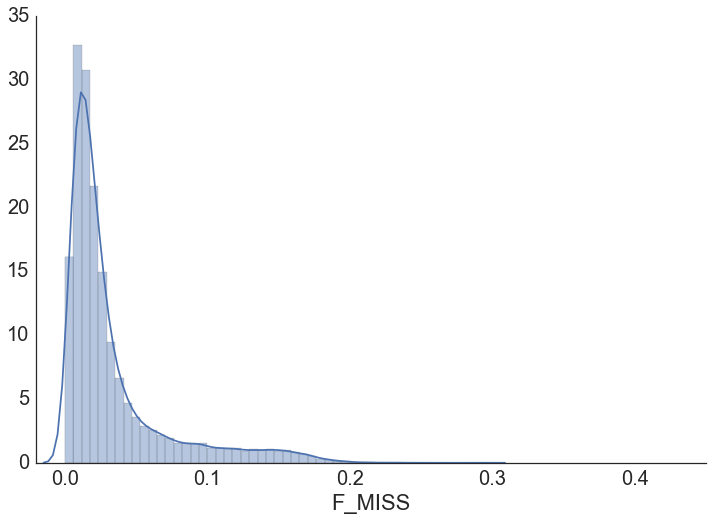

In [22]:
figsize(12,8)
sns.distplot(lmiss_means['F_MISS'])
sns.despine()
plt.xlim(-.02, .45)
plt.show()

### Minor Allele Frequency: MAF 

In [30]:
frq = pd.read_csv('PLINK_23759_465_out.frq.strat', 
                  sep = " ", skipinitialspace = True, index_col = False)
frq.head()

,CHR,SNP,CLST,A1,A2,MAF,MAC,NCHROBS
0,0,2_29,pop_1,1,2,0.21880,14,64
1,0,2_29,pop_2,1,2,0.03333,2,60
2,0,2_29,pop_3,1,2,0.45830,22,48
3,0,2_29,pop_4,1,2,0.03333,2,60
4,0,2_29,pop_5,1,2,0.12070,7,58


In [31]:
#frq['CLUSTER'] = [int(xx.split('_')[1]) for xx in frq['CLST']]
frq_group_mean = frq.groupby('SNP').mean()

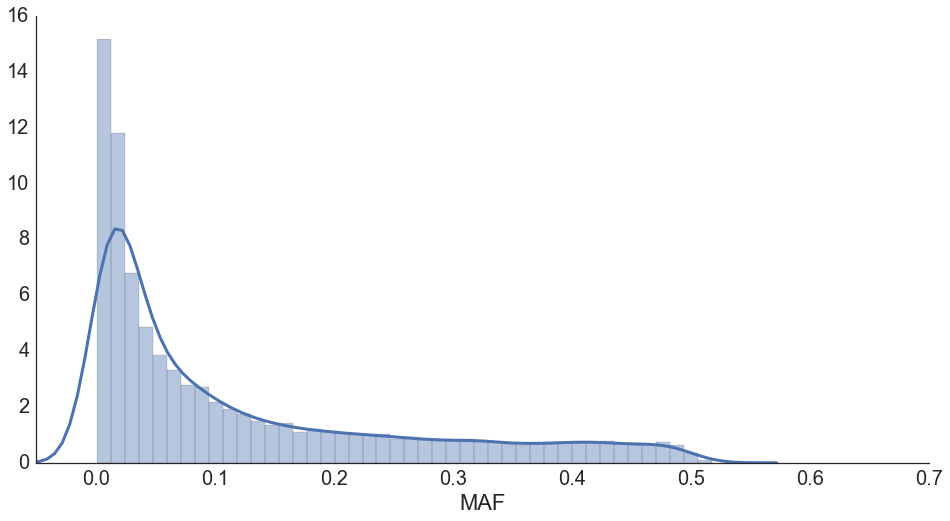

In [32]:
figsize(16, 8)
sns.distplot(frq_group_mean['MAF'], kde_kws = {"lw": 3})
plt.xlim(-.05, .7)
sns.despine()
plt.show()

### MAF by population

In [33]:
frq = pd.merge(frq, POPINFO, left_on = 'CLST', right_on='POP')
frq = frq.sort(columns = 'Order_geo')
frq.head()

C:\Users\Carolyn\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,CHR,SNP,CLST,A1,A2,MAF,MAC,NCHROBS,Order_geo,Order_lin,CLUSTER,POP,SILLI,POPNAME,YEAR,LINEAGE,CONTINENT
213830,0,104040_88,pop_9,4,2,0.00000,0,46,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
197985,0,26998_51,pop_9,4,2,0.38710,24,62,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
197986,0,27002_10,pop_9,2,4,0.25000,16,64,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
197987,0,27004_86,pop_9,3,4,0.00000,0,58,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
197988,0,27005_87,pop_9,4,2,0.01562,1,64,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia


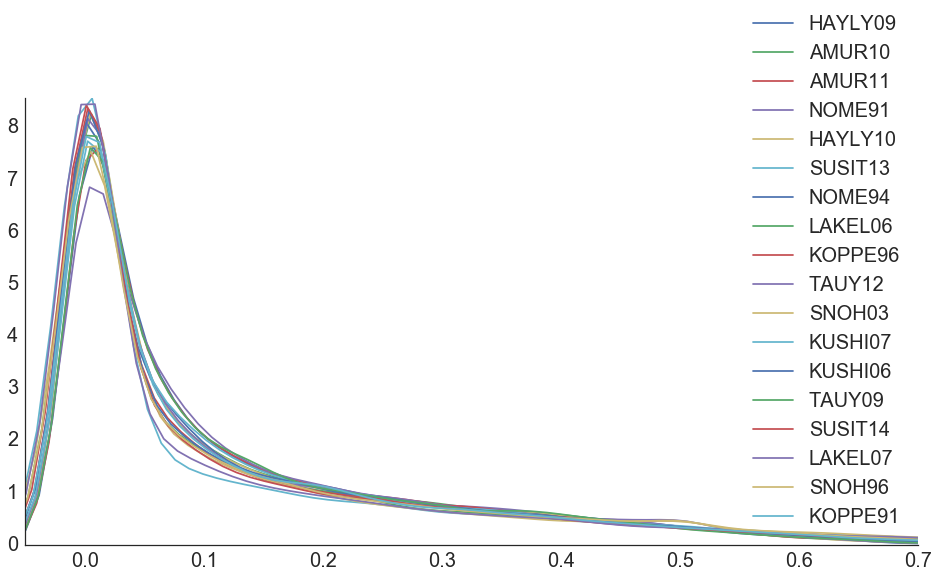

In [34]:
# these MAF are per-population, so can (locally) go above 0.5
figsize(16, 8)

for xx in set(frq['POPNAME']):
    sns.kdeplot(frq['MAF'][frq['POPNAME'] == xx], label = xx)
plt.xlim(-.05, .7)
sns.despine()
plt.show()

### FST

In [35]:
fst = pd.read_csv('PLINK_23759_465_out.fst', sep= "\t")
fst_sort = fst.sort_values(by=['FST'])
fst_sort['RANK'] = fst_sort['FST'].rank(ascending=1)
fst_sort.head()

,CHR,SNP,POS,NMISS,FST,RANK
16523,0,57197_8,0,457,-0.014929,1.0
302,0,1071_63,0,385,-0.011891,2.0
23160,0,84705_28,0,412,-0.011823,3.0
7534,0,25653_27,0,430,-0.010574,4.0
16546,0,57258_60,0,425,-0.009848,5.0


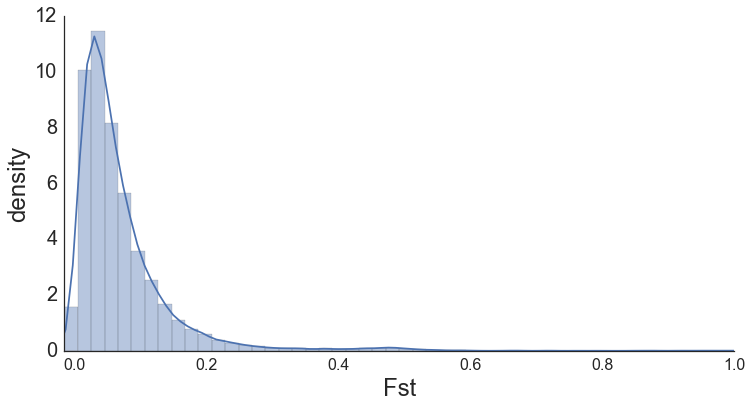

In [36]:
figsize(12, 6)

sns.distplot(fst['FST'], bins = 50)
plt.xlabel('Fst',fontsize = 24); plt.ylabel("density",fontsize = 24)
plt.xticks(fontsize = 16)
plt.xlim(min(fst['FST']), max(fst['FST']))
sns.despine()
plt.show()

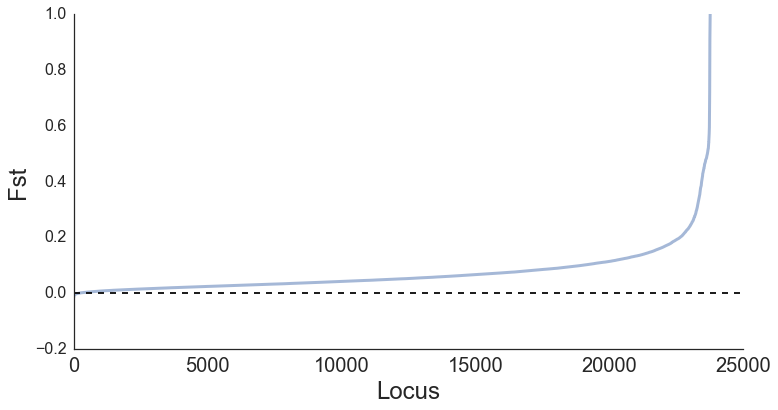

In [37]:
figsize(12, 6)
plt.plot(fst_sort['RANK'],fst_sort['FST'], lw= 3, alpha = .5)
plt.axhline(c='black', ls = '--')
plt.xlabel('Locus',fontsize = 24); plt.ylabel("Fst",fontsize = 24)
plt.yticks(fontsize = 16)
sns.despine()
plt.show()


### Heterozygosity 

In [39]:
from __future__ import division
het = pd.read_csv('PLINK_23759_465_out.het', sep= " ", skipinitialspace = True)
#het['CLUSTER'] = [int(xx.split('_')[1]) for xx in imiss['FID']]
het = pd.merge(het, POPINFO, left_on = 'FID', right_on = 'POP')
het = het.sort(columns = 'Order_geo')
het['O_het'] = 1-(het['O(HOM)']/het['N(NM)'])
het.head()

C:\Users\Carolyn\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,FID,IID,O(HOM),E(HOM),N(NM),F,Order_geo,Order_lin,CLUSTER,POP,SILLI,POPNAME,YEAR,LINEAGE,CONTINENT,O_het
232,pop_9,PKUSHI07_0005_comb,19404,19180.0,23253,0.05572,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia,0.165527
228,pop_9,PKUSHI07_0001_comb,19622,19240.0,23323,0.09251,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia,0.158685
229,pop_9,PKUSHI07_0002_comb,19597,19190.0,23257,0.10060,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia,0.157372
231,pop_9,PKUSHI07_0004,19436,18930.0,22932,0.12550,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia,0.152451
233,pop_9,PKUSHI07_0006_comb,19575,19210.0,23271,0.09034,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia,0.158824


### Heterozygosity per population

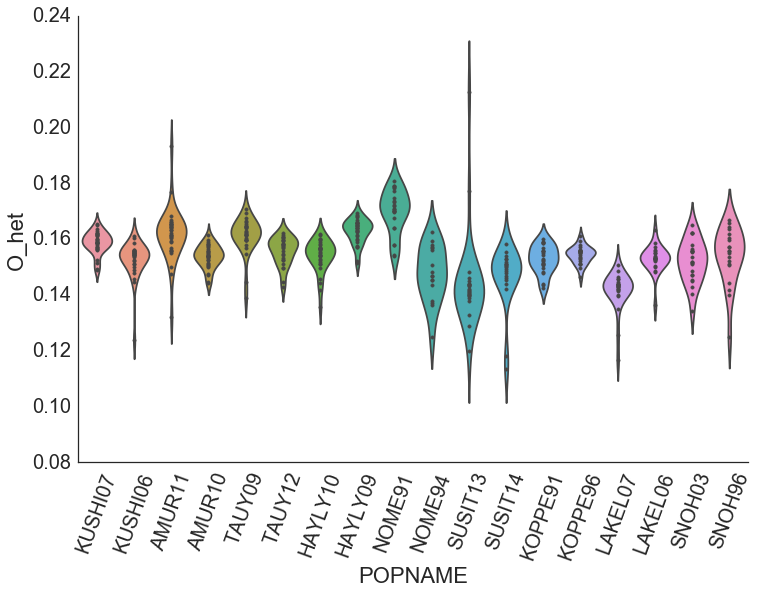

In [40]:
figsize(12, 8)
sns.violinplot(x = het['POPNAME'], y = het['O_het'],
            width= .8, scale = "width", inner="points", inner_kws={"ms": 16})

locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

### Heterozygosity by lineage

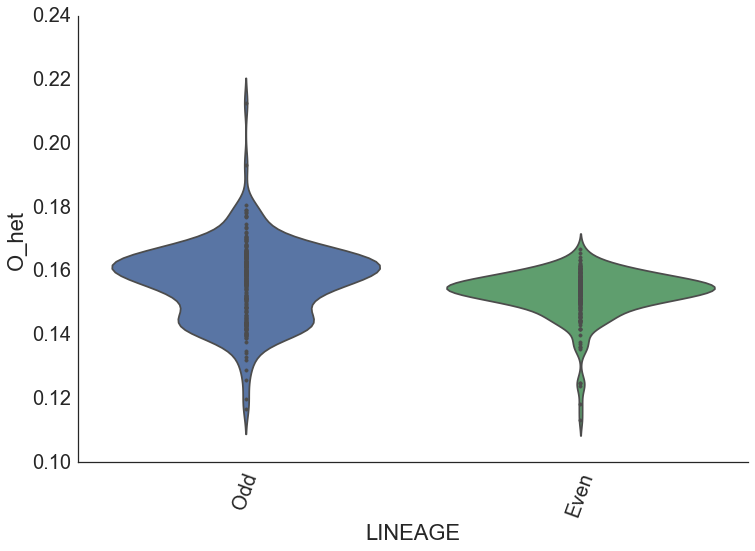

In [41]:
figsize(12, 8)
sns.violinplot(x = het['LINEAGE'], y = het['O_het'], width= .8, scale = "width", inner="points", inner_kws={"ms": 16})
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

### Heterozygosity by continent

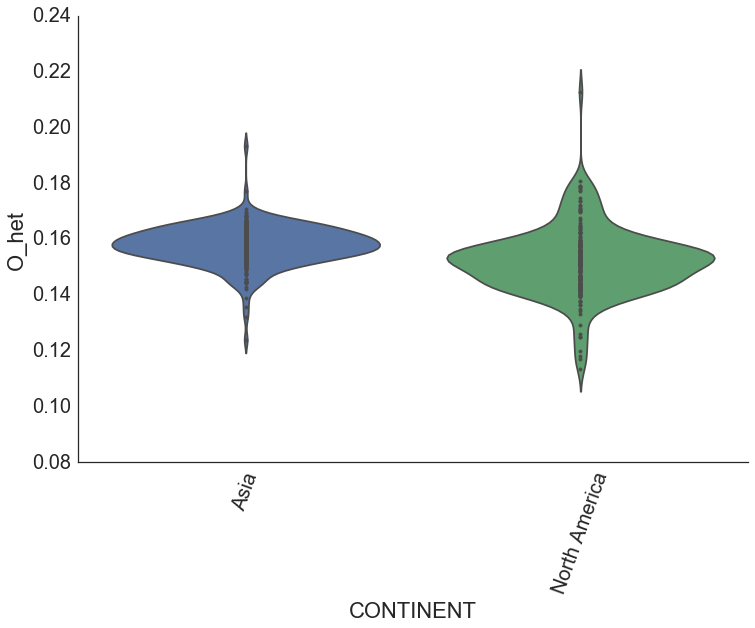

In [42]:
figsize(12, 8)
sns.violinplot(x = het['CONTINENT'], y = het['O_het'],
                width= .8, scale = "width", inner="points", inner_kws={"ms": 16})
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

### Inbreeding

PLINK calculates three inbreeding coefficients for each sample:

* Fhat1 is the usual variance-standardized relationship minus 1
* Fhat2 is computed from the expected autosomal homozygous genotype counts for each sample. Method-of-moments F coefficient estimates (i.e. ([observed hom. count] - [expected count]) / ([total observations] - [expected count])) 
* Fhat3 is based on the correlation between uniting gametes

In [43]:
ibc = pd.read_csv('PLINK_23759_465_out.ibc', sep= "\t")

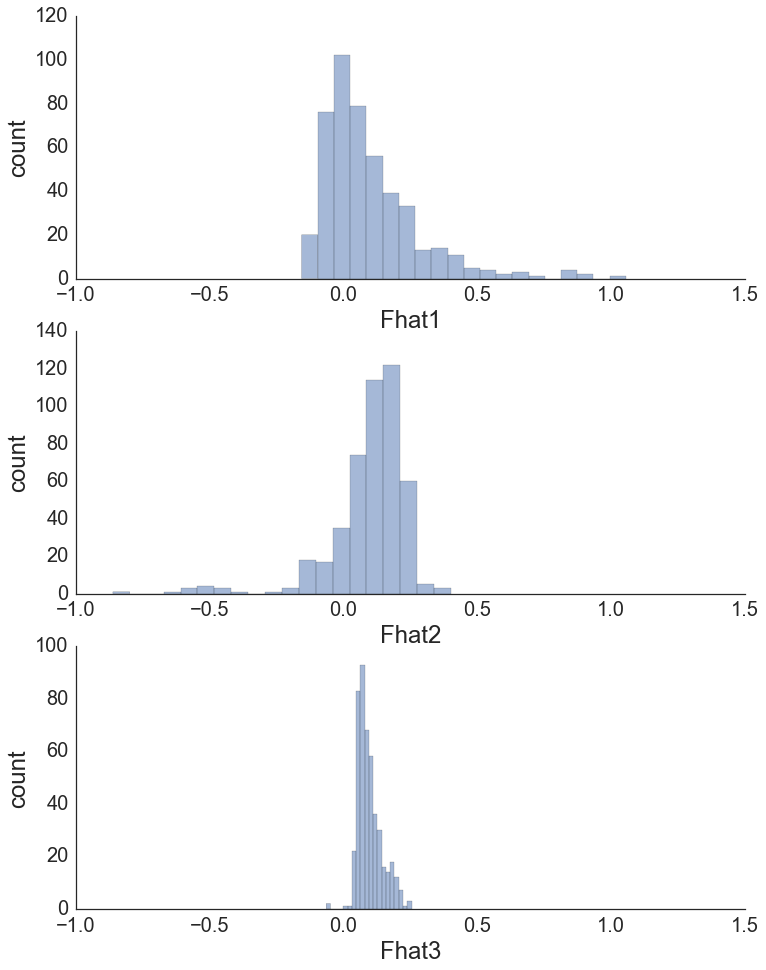

In [44]:
figsize(12, 16)
ax1 = plt.subplot(311)
plt.hist(ibc['Fhat1'] , bins = 20, alpha =.5)
plt.xlim(-.45, .7)
plt.xlabel('Fhat1',fontsize = 24); plt.ylabel("count",fontsize = 24)

plt.subplot(312,sharex=ax1)
plt.hist(ibc['Fhat2'] , bins = 20, alpha =.5)
plt.xlabel('Fhat2',fontsize = 24); plt.ylabel("count",fontsize = 24)
plt.subplot(313, sharex=ax1)
plt.hist(ibc['Fhat3'] , bins = 20, alpha =.5)
plt.xlabel('Fhat3',fontsize = 24); plt.ylabel("count",fontsize = 24)
sns.despine()
plt.show()

### Are inbreeding coefficients related to missingness? 

In [45]:
x = 1-(ibc['NOMISS']/max(ibc['NOMISS'])) # notice this isn't quite the total % missing, but it's close
y = ibc['Fhat2']
z = np.polyfit(x, y, 1)
fit = np.poly1d(z)

C:\Users\Carolyn\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


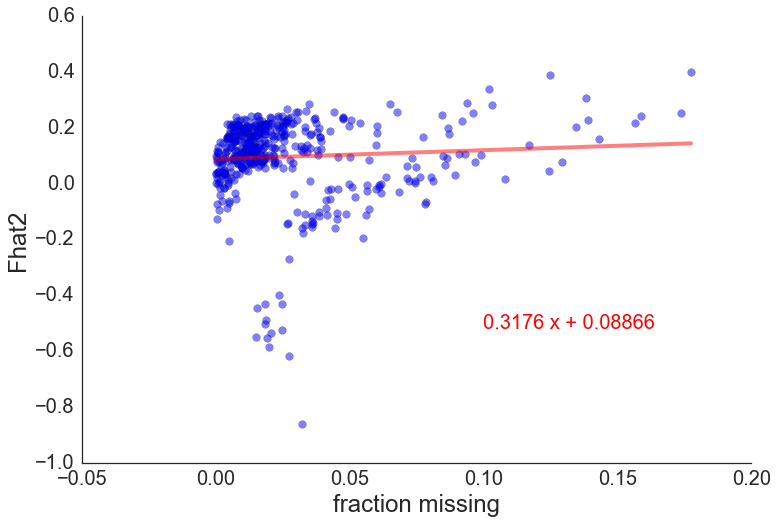

In [46]:
figsize(12, 8)
plt.scatter(x, y, s = 60, alpha = .5)
plt.plot(x.order(), fit(x.order()), 'r', lw = 4, alpha = .5)
plt.xlabel('fraction missing',fontsize = 24); plt.ylabel("Fhat2",fontsize = 24)
plt.annotate(fit,  xycoords='axes fraction', xy = (.6, .3), fontsize = 20, color = 'red')
sns.despine()
plt.show()

### F per population

In [47]:
het = pd.read_csv('PLINK_23759_465_out.het', sep = " ", skipinitialspace = True)
#het['CLUSTER'] = [int(xx.split('_')[1]) for xx in het['FID']]
het.head()

,FID,IID,O(HOM),E(HOM),N(NM),F
0,pop_1,PAMUR10_0001,19646,19130.0,23180,0.1264
1,pop_1,PAMUR10_0002,19672,19190.0,23249,0.1190
2,pop_1,PAMUR10_0003,19620,19150.0,23192,0.1162
3,pop_1,PAMUR10_0004,19597,19250.0,23326,0.0845
4,pop_1,PAMUR10_0005_comb,19132,18470.0,22358,0.1698


In [48]:
het = pd.merge(het, POPINFO, left_on = 'FID', right_on = 'POP')
het = het.sort(columns = 'Order_geo')
het.head()

C:\Users\Carolyn\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,FID,IID,O(HOM),E(HOM),N(NM),F,Order_geo,Order_lin,CLUSTER,POP,SILLI,POPNAME,YEAR,LINEAGE,CONTINENT
232,pop_9,PKUSHI07_0005_comb,19404,19180.0,23253,0.05572,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
228,pop_9,PKUSHI07_0001_comb,19622,19240.0,23323,0.09251,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
229,pop_9,PKUSHI07_0002_comb,19597,19190.0,23257,0.10060,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
231,pop_9,PKUSHI07_0004,19436,18930.0,22932,0.12550,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia
233,pop_9,PKUSHI07_0006_comb,19575,19210.0,23271,0.09034,1,1,9,pop_9,PKUSHI07,KUSHI07,2007,Odd,Asia


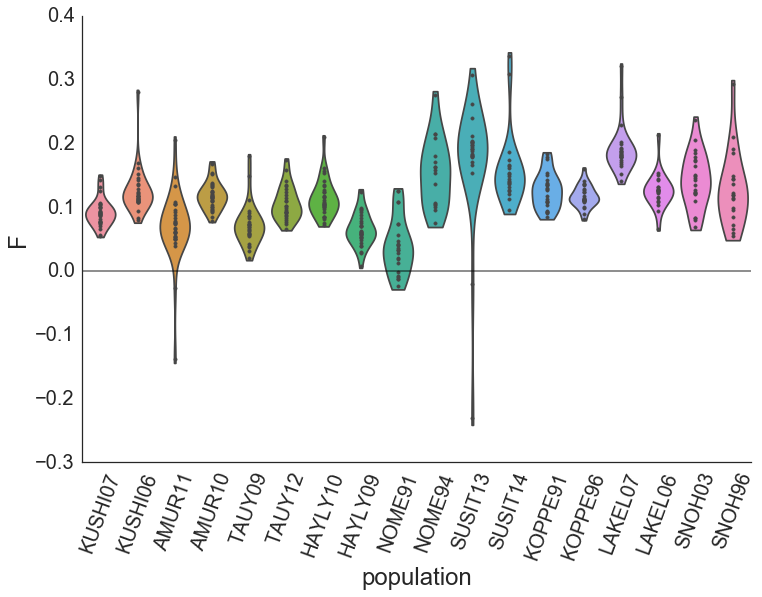

In [49]:
figsize(12, 8)
sns.violinplot(y = het['F'], x = het['POPNAME'], saturation = .8, width =.8, scale = "width",
               cut = .2, inner="points", inner_kws={"ms": 16})
plt.axhline(c='black', alpha = .5)
plt.xlabel('population',fontsize = 24); plt.ylabel("F",fontsize = 24)
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

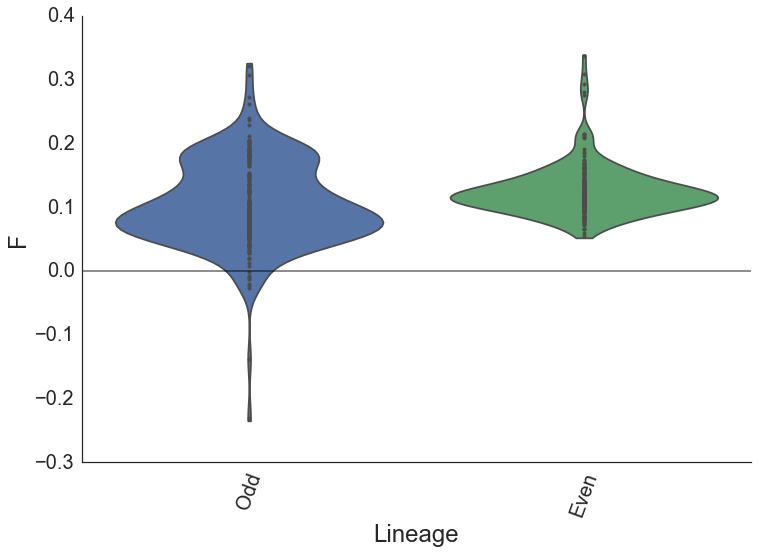

In [50]:
figsize(12, 8)
sns.violinplot(x = het['LINEAGE'], y = het['F'], saturation = .8, width =.8, scale = "width", cut =.2,
                inner="points", inner_kws={"ms": 16})
plt.axhline(c='black', alpha = .5)
plt.xlabel('Lineage',fontsize = 24); plt.ylabel("F",fontsize = 24)
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()

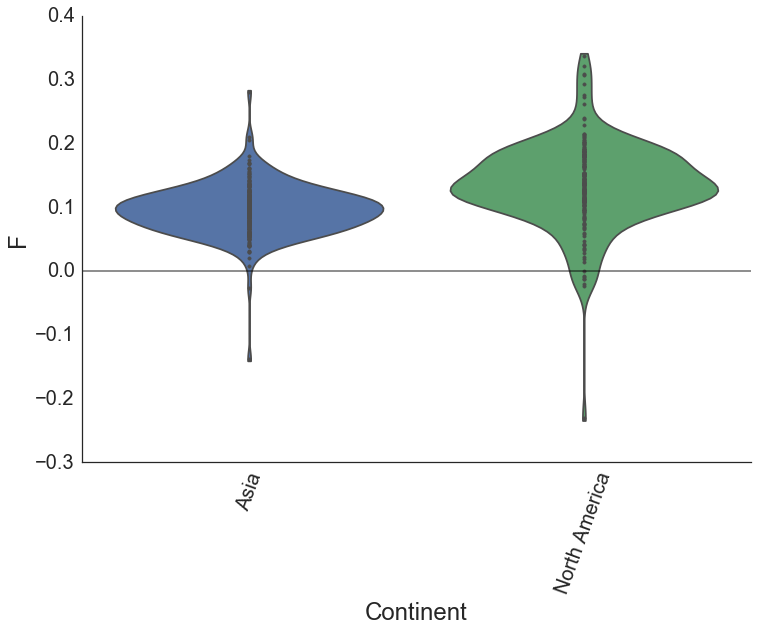

In [51]:
figsize(12, 8)
sns.violinplot(y = het['F'], x = het['CONTINENT'], saturation = .8, width =.8, scale = "width", cut =.2,
                inner="points", inner_kws={"ms": 16})
plt.axhline(c='black', alpha = .5)
plt.xlabel('Continent',fontsize = 24); plt.ylabel("F",fontsize = 24)
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
sns.despine()
plt.show()